In [1141]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from tqdm import tqdm
import torch
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

In [1142]:
train = pd.read_csv('./data/train.csv', index_col='PassengerId')
test = pd.read_csv('./data/test.csv')

In [1143]:
train

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S  
...            ...    ...               ...      ...   ...      ...  
887              0      0            211536  13.0000   NaN        S  
888              0      0            112053  30.0000   B42        S  
889              1      2        W./C. 6607  23.4500   NaN        S  
890              0      0            111369  30.0000  C148        C  
891              0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

In [1144]:
test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [1145]:
labels = train['Survived'].copy().astype('float32')
features = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
test_features = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
# features = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
# test_features = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()

In [1146]:
labels

PassengerId
1      0.0
2      1.0
3      1.0
4      1.0
5      0.0
      ... 
887    0.0
888    1.0
889    0.0
890    1.0
891    0.0
Name: Survived, Length: 891, dtype: float32

In [1147]:
# cast to float32

features['Sex'] = features['Sex'].map({'male': 1.0, 'female': -1.0})
features['Cherbourg'] = (features['Embarked'] == 'C').map({True: 1.0, False: 0.0})
features['Queenstown'] = (features['Embarked'] == 'Q').map({True: 1.0, False: 0.0})
features['Southampton'] = (features['Embarked'] == 'S').map({True: 1.0, False: 0.0})
features['Pclass'] = features['Pclass'].map({1: 1.0, 2: 0.0, 3: -1.0 })
features['Age'] = features['Age'].astype('float32')
features['SibSp'] = features['SibSp'].astype('float32')
features['Parch'] = features['Parch'].astype('float32')
features['Fare'] = features['Fare'].astype('float32')
default_age = features['Age'].mean()
default_fare = features['Fare'].mean()

# fillna

features['Age'].fillna(value=default_age, inplace=True)
features['Fare'].fillna(value=default_fare, inplace=True)
features['Parch'].fillna(value=0.0, inplace=True)
features['SibSp'].fillna(value=0.0, inplace=True)
features['Pclass'].fillna(value=0.0, inplace=True)
features['Sex'].fillna(value=0.0, inplace=True)

# normalize

std_age = features['Age'].mean()
features['Age'] = (features['Age'] - default_age) / std_age
mean_fare = features['Fare'].mean()
std_fare = features['Fare'].std()
features['Fare'] = (features['Fare'] - mean_fare) / std_fare
mean_parch = features['Parch'].mean()
std_parch = features['Parch'].std()
features['Parch'] = (features['Parch'] - mean_parch) / std_parch
mean_sibsp = features['SibSp'].mean()
std_sibsp = features['SibSp'].std()
features['SibSp'] = (features['SibSp'] - mean_sibsp) / std_sibsp

# drop unused

features = features.drop(columns=['Embarked'])

# process test data

# cast to float32

test_features['Sex'] = test_features['Sex'].map({'male': 1.0, 'female': -1.0})
test_features['Cherbourg'] = (test_features['Embarked'] == 'C').map({True: 1.0, False: 0.0})
test_features['Queenstown'] = (test_features['Embarked'] == 'Q').map({True: 1.0, False: 0.0})
test_features['Southampton'] = (test_features['Embarked'] == 'S').map({True: 1.0, False: 0.0})
test_features['Pclass'] = test_features['Pclass'].map({1: 1.0, 2: 0.0, 3: -1.0 })
test_features['Age'] = test_features['Age'].astype('float32')
test_features['SibSp'] = test_features['SibSp'].astype('float32')
test_features['Parch'] = test_features['Parch'].astype('float32')
test_features['Fare'] = test_features['Fare'].astype('float32')

# fillna

test_features['Age'].fillna(value=default_age, inplace=True)
test_features['Fare'].fillna(value=default_fare, inplace=True)
test_features['Parch'].fillna(value=0.0, inplace=True)
test_features['SibSp'].fillna(value=0.0, inplace=True)
test_features['Pclass'].fillna(value=0.0, inplace=True)
test_features['Sex'].fillna(value=0.0, inplace=True)

# normalize

test_features['Age'] = (test_features['Age'] - default_age) / std_age
test_features['Fare'] = (test_features['Fare'] - mean_fare) / std_fare
test_features['Parch'] = (test_features['Parch'] - mean_parch) / std_parch
test_features['SibSp'] = (test_features['SibSp'] - mean_sibsp) / std_sibsp

# drop unused

test_features = test_features.drop(columns=['Embarked'])


In [1148]:
features

Pclass  Sex       Age     SibSp     Parch      Fare  Cherbourg  \
PassengerId                                                                   
1              -1.0  1.0 -0.259237  0.432550 -0.473408 -0.502163        0.0   
2               1.0 -1.0  0.279499  0.432550 -0.473408  0.786404        1.0   
3              -1.0 -1.0 -0.124553 -0.474279 -0.473408 -0.488580        0.0   
4               1.0 -1.0  0.178486  0.432550 -0.473408  0.420494        0.0   
5              -1.0  1.0  0.178486 -0.474279 -0.473408 -0.486064        0.0   
...             ...  ...       ...       ...       ...       ...        ...   
887             0.0  1.0 -0.090882 -0.474279 -0.473408 -0.386454        0.0   
888             1.0 -1.0 -0.360250 -0.474279 -0.473408 -0.044356        0.0   
889            -1.0 -1.0  0.000000  0.432550  2.007806 -0.176164        0.0   
890             1.0  1.0 -0.124553 -0.474279 -0.473408 -0.044356        1.0   
891            -1.0  1.0  0.077473 -0.474279 -0.473408 -0.492101        0.0   

             Queenstown  Southampton  
PassengerId                           
1                   0.0          1.0  
2                   0.0          0.0  
3                   0.0          1.0  
4                   0.0          1.0  
5                   0.0          1.0  
...                 ...          ...  
887                 0.0          1.0  
888                 0.0          1.0  
889                 0.0          1.0  
890                 0.0          0.0  
891                 1.0          0.0  

[891 rows x 9 columns]

In [1149]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=3)

In [1150]:
class MyModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.i = torch.nn.Linear(input_dim, 7)
        self.h = torch.nn.Linear(7, 5)
        self.h2 = torch.nn.Linear(5, output_dim)
        
    def forward(self, x):
        x = torch.relu(self.i(x))
        x = torch.relu(self.h(x))
        outputs = torch.sigmoid(self.h2(x))
        return outputs

In [1151]:
epochs = 10_000
# input_dim = 6
input_dim = 9
output_dim = 1

model = MyModel(input_dim, output_dim)
criterion = torch.nn.BCELoss()
# criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01, lr_decay=0, weight_decay=0)

In [1152]:
X_train, X_test = torch.Tensor(X_train.values), torch.Tensor(X_test.values)
y_train, y_test = torch.Tensor(y_train.values), torch.Tensor(y_test.values)
X_export = torch.Tensor(test_features.values)

In [1153]:
losses = []
losses_test = []
acc = []
acc_test = []
Iterations = []
best_state = model.state_dict()
iter = 0

for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    lbls = y_train
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), lbls)
    loss.backward() 
    optimizer.step()
    
    iter+=1
    if iter%100==0:
        # calculate Accuracy
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            acc_test.append(accuracy_test)
            
            if len(losses_test) > 1 and losses_test[-1] < losses_test[-2]:
                best_state = model.state_dict()
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            acc.append(accuracy)

Training Epochs: 100%|██████████████████| 10000/10000 [00:11<00:00, 848.87it/s]


<AxesSubplot: xlabel='Iteration', ylabel='value'>

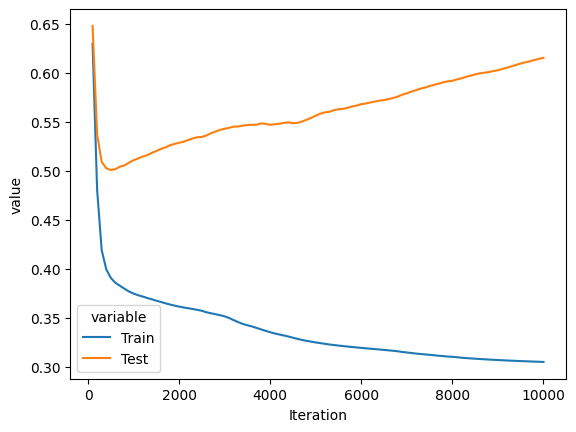

In [1154]:
data = pd.DataFrame({
    'Iteration': Iterations,
    'Train': losses,
    'Test': losses_test
})

sns.lineplot(x='Iteration', y='value', hue='variable', data=pd.melt(data, ['Iteration']))

<AxesSubplot: xlabel='Iteration', ylabel='value'>

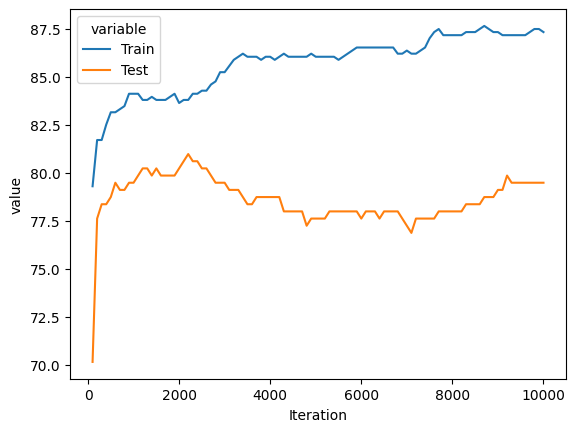

In [1155]:
data = pd.DataFrame({
    'Iteration': Iterations,
    'Train': acc,
    'Test': acc_test
})

sns.lineplot(x='Iteration', y='value', hue='variable', data=pd.melt(data, ['Iteration']))

In [1158]:
print(max(acc_test), max(acc))

80.97014925373135 87.64044943820225


In [1157]:
model.load_state_dict(best_state)

with torch.no_grad():
    outputs = model(X_export).round().detach().numpy()
export = pd.DataFrame(data=outputs, columns=['Survived'])
export['Survived'] = export['Survived'].astype('int')
export['PassengerId'] = test['PassengerId']
export = export[['PassengerId', 'Survived']]
export.to_csv('data/submission.csv', index=False)
export

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]